**It is used to create test vs train split of the dataset and apply data augmentation techniques to generate better results.**

In [ ]:
!pwd 
!pip install opencv-contrib-python-headless  ##Command to install open cv on gpu (Nvidia DGX server in our case)

/workspace/home/Digital-SC_dataset2_final_segmentation
     |████████████████████████████████| 54.0 MB 464 kB/s eta 0:00:013
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import cv2
import pickle
import os
import os


In [ ]:
#SAVING IMAGES IN 640 X 480 SHAPE
SIZE_X = 480
SIZE_Y = 640
IMG_SIZE = 352
input_shape=(SIZE_X, SIZE_Y, 3)

In [ ]:
### CHECKING THE DATASET CATEGORY---AND ALLOCATING THE INDEX FOR THE CATEGORY  (ALSO PRINTING JUST FOR A SANITY CHECK)
import os
category=os.listdir("Our_dataset/GT/")
intruder_to_index={}
index_to_intruder={}
i=0
for intruder in category:
    intruder_to_index[intruder]=i
    index_to_intruder[i]=intruder
    i+=1
print(intruder_to_index)
print(index_to_intruder)

{'cow': 0, 'cats': 1, 'human': 2, 'goat': 3, 'birds': 4, 'dog': 5, 'buffalo': 6, 'deer': 7}
{0: 'cow', 1: 'cats', 2: 'human', 3: 'goat', 4: 'birds', 5: 'dog', 6: 'buffalo', 7: 'deer'}


In [ ]:
## TEST AND TRAIN DATA FOR RESPECTIVE MODELS 
X_train=[]
X_test=[]
X_train_t=[]
X_test_t=[]
y_train=[]
y_test=[]
X_train_label=[]
y_train_label=[]
X_test_label=[]
y_train_label=[]

In [ ]:
print(intruder_to_index)
print(index_to_intruder)

{'cow': 0, 'cats': 1, 'human': 2, 'goat': 3, 'birds': 4, 'dog': 5, 'buffalo': 6, 'deer': 7}
{0: 'cow', 1: 'cats', 2: 'human', 3: 'goat', 4: 'birds', 5: 'dog', 6: 'buffalo', 7: 'deer'}


**SINCE DATA IS AVAILABLE IN THE BAD FORMAT, NEED TO CODE FOR DIFFERENT FOLDER AND RESPECTIVE DATA DIRECTORY FORMAT FOLLOWED.**

In [ ]:
PATH_GT="Our_dataset/GT/"
path_rgb1="Our_dataset/RGB/"
path_rgb2="Our_dataset/RGB_local/"
path_thermal="Our_dataset/thermal/"
path_thermal2="Our_dataset/thermal_local/"

path=PATH_GT+intruder

rgb=path_rgb2
thermal=path_thermal2
images=os.listdir(rgb)
t_xtrain=[]
t_xtrain_gt=[]
t_xtrain_thermal=[]
t_label=[]


for img_name in images:
    if (os.path.isfile(thermal+img_name)):
        if (os.path.isfile(PATH_GT+"cow/"+img_name) or os.path.isfile(PATH_GT+"goat/"+img_name) or os.path.isfile(PATH_GT+"human/"+img_name) or os.path.isfile(PATH_GT+"buffalo/"+img_name) or (os.path.isfile(PATH_GT+"dog/"+img_name))):
            ##READ GT and label
            
            label=[0]*len(category)
            image_gt=np.array([[0]*SIZE_Y]*SIZE_X)
            sub_intruder=["cow","dog","goat","human","buffalo"]  ##REQUIRED TO MAKE MULTI-LABEL VECTOR
            for sub_cat in sub_intruder:
                path=PATH_GT+sub_cat+"/"+img_name
                
                if os.path.isfile(path):
                    img = cv2.imread(path)
                    img = cv2.resize(img, (SIZE_Y, SIZE_X))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    image_gt=image_gt+img
                    label[intruder_to_index[sub_cat]]=1
                
            t_xtrain_gt.append(image_gt)
            t_label.append(label)


            ##READ RGB

            path=rgb+img_name
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (SIZE_Y, SIZE_X))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            t_xtrain.append(img)

            ##READ THERMAL

            path=thermal+img_name
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (SIZE_Y, SIZE_X))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            t_xtrain_thermal.append(img)


    


In [ ]:
print(len(t_xtrain_gt))

81


In [ ]:
rgb=path_rgb1
thermal=path_thermal
images=os.listdir(rgb)
for img_name in images:
#     print(thermal+img_name)
    if (os.path.isfile(thermal+img_name)):
        if (os.path.isfile(PATH_GT+"deer/"+img_name) or os.path.isfile(PATH_GT+"birds/"+img_name) or os.path.isfile(PATH_GT+"cats/"+img_name)):
            
            ##READ GT and label
            
            label=[0]*len(category)
            image_gt=np.array([[0]*SIZE_Y]*SIZE_X)
            sub_intruder=["deer","birds","cats"]
            
            for sub_cat in sub_intruder:
                path=PATH_GT+sub_cat+"/"+img_name
                
                if os.path.isfile(path):
                    img = cv2.imread(path)
                    img = cv2.resize(img, (SIZE_Y, SIZE_X))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#                     img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                    image_gt=image_gt+img
                    label[intruder_to_index[sub_cat]]=1
                
            t_xtrain_gt.append(image_gt)
            t_label.append(label)


            ##READ RGB

            path=rgb+img_name
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (SIZE_Y, SIZE_X))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            t_xtrain.append(img)

            ##READ THERMAL

            path=thermal+img_name
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (SIZE_Y, SIZE_X))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            t_xtrain_thermal.append(img)

In [ ]:
print(len(t_xtrain_gt))


123


In [ ]:
PATH_GT="campus_dataset/GT_campus/"
path=PATH_GT+intruder

rgb="campus_dataset/RGB_campus/"
thermal="campus_dataset/thermal_campus/"
images=os.listdir(rgb)

for img_name in images:
    if (os.path.isfile(thermal+img_name)):
        if (os.path.isfile(PATH_GT+"birds/"+img_name) or os.path.isfile(PATH_GT+"dog/"+img_name) or os.path.isfile(PATH_GT+"human/"+img_name)):
            
            label=[0]*len(category)
            image_gt=np.array([[0]*SIZE_Y]*SIZE_X)
            sub_intruder=["birds","dog","human"]
            for sub_cat in sub_intruder:
                path=PATH_GT+sub_cat+"/"+img_name
                
                if os.path.isfile(path):
                    img = cv2.imread(path)
                    img = cv2.resize(img, (SIZE_Y, SIZE_X))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#                     img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#                     img = np.expand_dims((np.array(img)),3)
                    image_gt=image_gt+img
                    label[intruder_to_index[sub_cat]]=1
                
            t_xtrain_gt.append(image_gt)
            t_label.append(label)


            ##READ RGB

            path=rgb+img_name
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (SIZE_Y, SIZE_X))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            t_xtrain.append(img)

            ##READ THERMAL

            path=thermal+img_name
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (SIZE_Y, SIZE_X))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            t_xtrain_thermal.append(img)



In [ ]:
print(len(t_label),len(t_xtrain),len(t_xtrain_gt),len(t_xtrain_thermal))

230 230 230 230


In [ ]:
def print_train(index,gt,ir,gb,d): ##CAN DISPLAY THE RESPECTIVE INDEX VALUE FOR ALL DIFFERENT FORMAT
    plt.imshow(gt[index])
    plt.show()
    plt.imshow(ir[index])
    plt.show()
    plt.imshow(gb[index])
    plt.show()
    print(d[index])
    print("--------------------------------------------------------------")
    

**Spliting the dataset below.**

In [ ]:
from sklearn.model_selection import train_test_split
zX_train, X_test, zX_train_t ,X_test_t, zy_train, y_test, zy_train_label,y_test_label  = train_test_split(t_xtrain,t_xtrain_thermal,t_xtrain_gt,t_label,test_size = 0.2, random_state = 5)


**For data augmentation, we have rotated each image in all 4 direction that is original and 90,180 and 270 degree rotated image. Each image is further augmented by reducing the contrass and brightness upto listed values in code. This augmentation leads to improve the results by 10% in evaluation matrices which we have used while training the model using these images.**

In [ ]:
def change_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    v=cv2.add(v,value)
    v[v > 255] = 255
    v[v <= 0] =0

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def change_contrass(img):
    beta=0
    alpha=random.uniform(0.3, 1)
    nimg= cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return nimg

**CONVERTING TO NP ARRAY TYPE**

In [ ]:
N_train=len(zX_train)
print(N_train)
zX_train=np.array(zX_train)
zX_train_t=np.array(zX_train_t)
zy_train=np.array(zy_train)
zy_train_label=np.array(zy_train_label)

184


**Traversing each image from test dataset and adding the respected augmented images.**

In [ ]:
import random
for i in range(N_train):
    
    ##original reading
    img=zX_train[i]
    img_t=zX_train_t[i]
    img_gt=zy_train[i]
    lbl=zy_train_label[i]
    
    for r in range(4):
        img=np.rot90(img)
        img_t=np.rot90(img_t)
        img_gt=np.rot90(img_gt)
    
        ##Normal 
        
        X_train.append(img)
        X_train_t.append(img_t)
        y_train.append(img_gt)
        y_train_label.append(lbl)

        ##change brightness (random 3)
        for j in range(3):
            bcoeff=random.randint(30,255)-255
            temp=change_brightness(img,bcoeff)
            
            X_train.append(temp)
            ##same
            X_train_t.append(img_t)
            y_train.append(img_gt)
            y_train_label.append(lbl)

        ## change contrass (random 3)

        for j in range(3):
            temp=change_contrass(img)

            X_train.append(temp)
            ##same
            X_train_t.append(img_t)
            y_train.append(img_gt)
            y_train_label.append(lbl)


In [ ]:
#### CONVERTING EACH LIST TO NP ARRAY TYPE 

X_test=np.array(X_test)
X_test_label=np.array(X_test_label)
X_test_t=np.array(X_test_t)
y_test=np.array(y_test)
y_test_label=np.array(y_test_label)
X_train_t=np.array(X_train_t)
y_train=np.array(y_train)
y_train_label=np.array(y_train_label)
X_train=np.array(X_train)

In [ ]:
### SINCE GROUND TRUTH IMAGES ARE OF 2 DIM. ONLY, WE WILL EXTEND THE DIMENSION OF THE IMAGE FOR PROPER TRAINING
y_train = np.expand_dims((np.array(y_train)),3)
y_test = np.expand_dims((np.array(y_test)),3)

In [ ]:
print(X_test.shape,y_test_label.shape,y_test.shape,X_test_t.shape,y_test.shape,y_train.shape,y_train_label.shape,X_train.shape,y_train_label.shape,X_train_t.shape)

(46, 352, 352, 3) (46, 8) (46, 352, 352, 1) (46, 352, 352, 3) (46, 352, 352, 1) (5152, 352, 352, 1) (5152, 8) (5152, 352, 352, 3) (5152, 8) (5152, 352, 352, 3)


In [ ]:
###NORMALIZING THE IMAGE FROM 0 TO 1 RANGE
X_test=X_test/255.
X_test_t=X_test_t/255.
X_train_t=X_train_t/255.
X_train=X_train/255.

In [ ]:
t_train=y_train
t_test=y_test

##DUE TO INCONSISTENCY IN THE GROUND TRUTH LABEL SEGMENTED IMAGE, WE WILL FURTHER DO THE THRESHOLD OF THE IMAGE TO GET ONLY 0 OR 1 IN THE FINAL NORMALIZE IMAGE (IN FLOATING FORMAT)
y_train=(y_train>50)/1.0
y_test=(y_test>50)/1.0

In [ ]:
X_test=t_xtrain
y_test=t_xtrain_gt
X_test_t=t_xtrain_thermal

**Saving image for the reference as per requirement**

In [ ]:
import random

index=random.randint(0,len(X_test))
folder="dataset"
for i in range(len(X_test)):
    index=i
    img=X_test[index]
    mask=y_test[index]
    img_t=X_test_t[index]
#     print(index)

#     import matplotlib.pyplot as plt
#     plt.imshow(img)
    plt.imsave(folder+"/"+str(index)+"_RGB.png",img)
    plt.show()
# # #     cv2.imwrite("predicted_images/"+str(index)+"RGB.png",img*255)
# # # #     cv2.waitKey(0)
# # # #     p
#     plt.show();
#     plt.imshow(img_t)
#     cv2.imwrite(folder+str(index)+"THERMAL.png",img_t)
    plt.imsave(folder+"/"+str(index)+"_THERMAL.png",img_t)
    plt.show()

# # # #     cv2.waitKey(0)
#     plt.show()
# #     plt.imshow(mask)
#     cv2.imwrite(folder+str(index)+"GT.png",mask*255)
    plt.imsave(folder+"/"+str(index)+"_GT.png",mask)
    plt.show()

# #     cv2.waitKey(0)
# #     plt.show()

#     print("#####  PREDICTED  ######")
#     x=np.array([img])
#     x_t=np.array([img_t])
#     y_output=model.predict([x,x_t])
#     # cv2.imwrite("predicted_images/"+str(index)+".png",y_output[0]>0.5)

# #     plt.imshow(y_output[0]>=0.5,cmap='gray')
#     # plt.show()

#     saliencyMap = (y_output[0] * 255).astype("uint8")
#     otsu_threshold, image_result = cv2.threshold(saliencyMap, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#     print("Obtained threshold: ", otsu_threshold)
#     plt.imshow(image_result,cmap='gray')
#     cv2.imwrite("predicted_images/"+str(index)+"PREDICTED.png",image_result)
#     plt.imsave("predicted_images/"+str(index)+"PREDICTED.png",image_result,cmap='gray')
#     plt.show()
    #     cv2.waitKey(0)

# # plt.show()
# plt.imsave(image_result)
# plt.imsave("graphs/b200_2otsu.png",image_result,cmap='gray')

In [ ]:
####### SAVING THE ARRAYS OF TEST AND TRAIN FOR FURTHER USE #########


np.save("new_split_data/X_train.npy",X_train)
np.save("new_split_data/X_test.npy",X_test)
np.save("new_split_data/X_train_t.npy",X_train_t)
np.save("new_split_data/X_test_t.npy",X_test_t)
np.save("new_split_data/y_train.npy",y_train)
np.save("new_split_data/y_test.npy",y_test)
np.save("new_split_data/y_test_label.npy",y_test_label)
np.save("new_split_data/y_train_label.npy",y_train_label)


#### LOADING TEST AND TRAIN ARRAYS ########

X_train=np.load("label_split_data/X_train.npy")
X_test=np.load("label_split_data/X_test.npy")
X_train_t=np.load("label_split_data/X_train_t.npy")
X_test_t=np.load("label_split_data/X_test_t.npy")
y_train=np.load("label_split_data/y_train.npy")
y_test=np.load("label_split_data/y_test.npy")
y_test_label=np.load("label_split_data/y_test_label.npy")
y_train_label=np.load("label_split_data/y_train_label.npy")


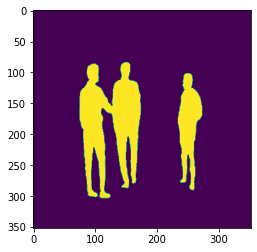

In [ ]:
########  PRINTING A SAMPLE GROUND TRUTH IMAGE ############

img = cv2.imread("campus_dataset/GT_campus/human/IR_00105.png",0)
# img=cv2.imread("a.png",0)
img = cv2.resize(img, (SIZE_Y, SIZE_X))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# # print(img)
plt.imshow(img>10)
plt.show()
# cv2.imwrite("predicted_images/"+str(21)+"GT.png",img)
